## Linear Regression Model

### Imports and Utils

In [1]:
"""
Importing the necessary libraries
"""
import os
from time import time
import pickle

import torch
import torchvision
import torch.nn as nn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.special import xlogy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

try:
    import plotly.express as px
except ModuleNotFoundError:
    %pip install plotly
    import plotly.express as px

try:
    from ucimlrepo import fetch_ucirepo
except ModuleNotFoundError:
    %pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading and Preprocessing

In [4]:
target = 'mpg'

# Dataset 1 Auto MPG
# '''
dataset = fetch_ucirepo(id=9)
dataset = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# Cleaning the data
dataset = dataset.replace('?', np.nan).dropna()
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'])

# Print the first few records
print(dataset.head())

# Print the size of the dataset
print("size of the dataset: ", dataset.shape)
# '''

   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  
size of the dataset:  (392, 8)


In [5]:
# Data Visualization
for column in dataset.drop(target,axis=1).columns:
    fig = px.density_heatmap(dataset, x=column, y=target, color_continuous_scale='magma_r')
    fig.show()

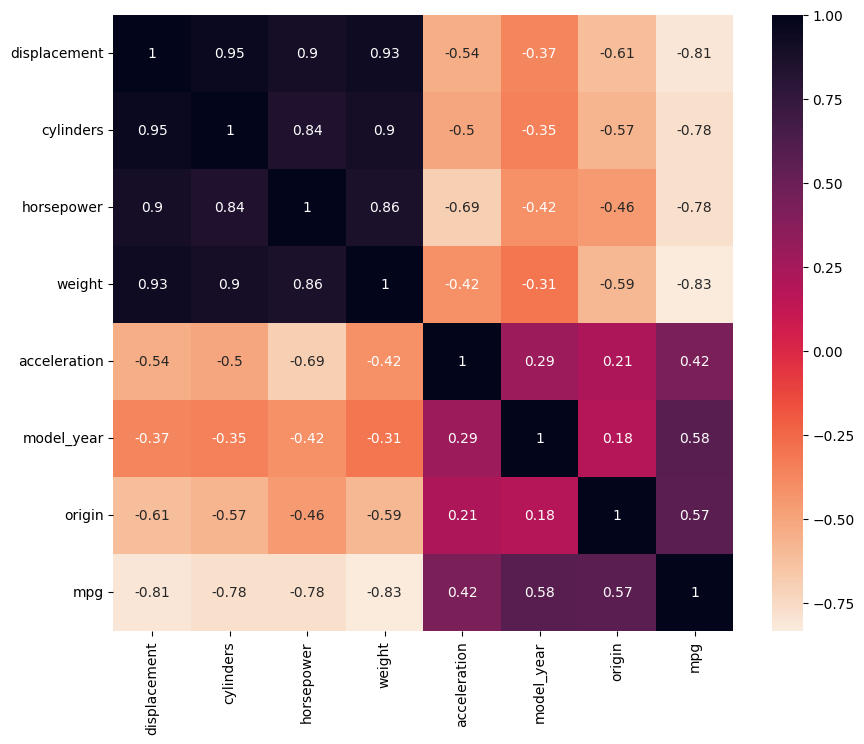

In [9]:
# Checking coorelation within the dataset
dataset_corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dataset_corr, cmap='rocket_r',annot=True)
plt.show()

In [10]:
# Feature selection
threshold = 0.35
target_corr = abs(dataset_corr.iloc[:, -1])
features = target_corr[target_corr > threshold].index

# Display the relevant features
dataset = dataset[features]
print("Relevant Features:\n", features.values)

Relevant Features:
 ['displacement' 'cylinders' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin' 'mpg']


In [11]:
# Extract X and Y from dataset
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Print the first few records
print(f'Feature Train Dataset:\n{X_train.head()}\nsize: {X_train.shape}\n')
print(f'Target Train Dataset:\n{Y_train.head()}\nsize: {Y_train.shape}\n')
print(f'Feature Test Dataset:\n{X_test.head()}\nsize: {X_test.shape}\n')
print(f'Target Test Dataset:\n{Y_test.head()}\nsize: {Y_test.shape}\n')

Feature Train Dataset:
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
260         225.0          6       110.0    3620          18.7          78   
184         140.0          4        92.0    2572          14.9          76   
174         171.0          6        97.0    2984          14.5          75   
64          318.0          8       150.0    4135          13.5          72   
344          86.0          4        64.0    1875          16.4          81   

     origin  
260       1  
184       1  
174       1  
64        1  
344       1  
size: (313, 7)

Target Train Dataset:
260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
Name: mpg, dtype: float64
size: (313,)

Feature Test Dataset:
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
79           96.0          4        69.0    2189          18.0          72   
276         121.0          4       115.0    2795          15.7          78   
248          91.0          4  

### Model Creation and Training

### Testing and Plotting

## Linear Regression Model

### Imports and Utils

### Dataset Loading and Preprocessing

### Model Creation and Training

### Testing and Plotting